<a href="https://colab.research.google.com/github/DeisyData/Curso-Inteligencia-Artificial/blob/main/Clase_1_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Instalando librerias

In [294]:
!pip install scikit-fuzzy

# 2. Importar librerias

In [295]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Control Proporcional - Sistema SISO
Diseñar un control proporcional para una entrada (error) y una salida(acción de control)

**Variable de entrada (input)- Antecedente**

error
*   ¿Qué tan grande es el error?
*   Conjunto término: [Negativo, Cero, Positivo]
*   Universo: el universo de esta variable se define en [-100,100] %

**Variable de salida (output)- Consecuencia**

control
*   La acción de control se define como una tensión de máximo 12 V ¿Cuál es el valor de la acción de control?
*   Conjunto término: [Negativo, Cero, Positivo]
*   Universo: el universo de esta variable se define en [-12,12] %

**Reglas**

1.   **SI** El error es *negativo* **ENTONCES** La acción de control es *negativa*
2.   **SI** El error es *cero* **ENTONCES** La acción de control es *cero*
3.   **SI** El error es *positivo* **ENTONCES** La acción de control es *positivo*





### **PASO 1. Variable de entrada**

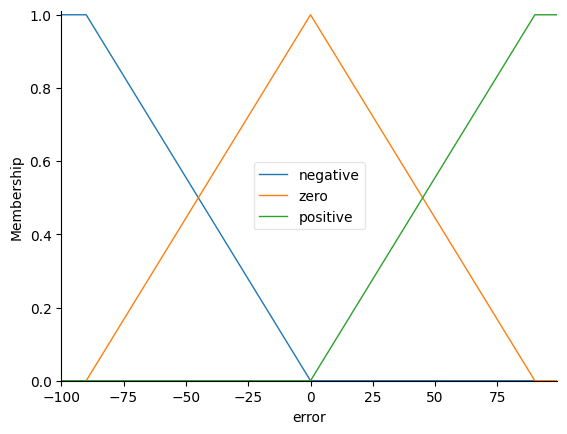

In [296]:
error = ctrl.Antecedent(np.arange(-100,100,1),'error')
error['negative'] = fuzz.trapmf(error.universe,[-100,-100,-90,0])
error['zero'] = fuzz.trimf(error.universe,[-90,0,90])
error['positive'] = fuzz.trapmf(error.universe,[0,90,100,100])
error.view()

# Para disminuir la zona muerta y la de saturacion se modificaron los puntos de la sintersecciones desplazandolas mas cerca a -100 y 100

### **PASO 2. Variable de salida**

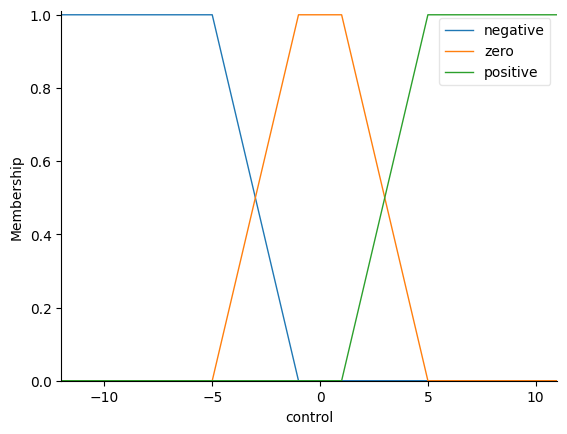

In [297]:
control = ctrl.Consequent(np.arange(-12,12,1), 'control')
control['negative'] = fuzz.trapmf(control.universe,[-12,-12,-5,-1])
control['zero'] = fuzz.trapmf(control.universe,[-5,-1,1,5])
control['positive'] = fuzz.trapmf(control.universe,[1,5,12,12])
control.view()

# Para que la respuesta se más proporcional se acercaron mas los puntos hacia 0

### **PASO 3. Inferencia**

In [298]:
rule1 = ctrl.Rule(error['negative'],control['negative'])
rule2 = ctrl.Rule(error['zero'],control['zero'])
rule3 = ctrl.Rule(error['positive'],control['positive'])

In [299]:
control_sys = ctrl.ControlSystem([rule1,rule2,rule3])
control_sim = ctrl.ControlSystemSimulation(control_sys)

### **PASO 4. Evaluar/SImular en un punto**

Salida defuzzificada = 2.3968871595330743
Salida defuzzificada  redondeada= 2.4


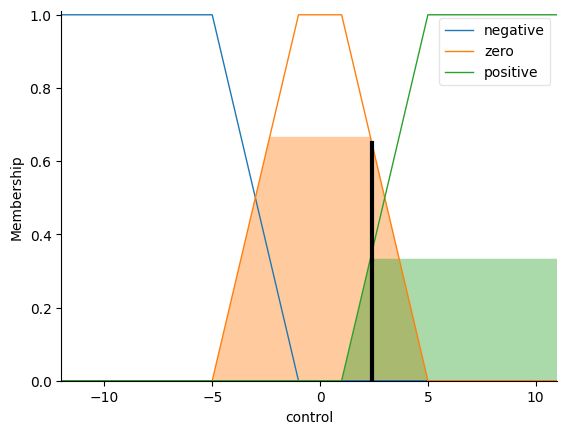

In [300]:
control_sim.input['error'] = 30
control_sim.compute()
control.view(sim=control_sim)
print("Salida defuzzificada =", control_sim.output['control'])
print("Salida defuzzificada  redondeada=", round(control_sim.output['control'],2))

### **Paso 5. Gráfica de salida - Contorno**

In [301]:
error_values = np.linspace(-100,100,2001)
out = np.zeros_like(error_values)
n = error_values.size

In [302]:
for i in range (n):
  control_sim.input['error'] = error_values[i]
  control_sim.compute()
  out[i]  = control_sim.output['control']

In [303]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'acción de control [V]')

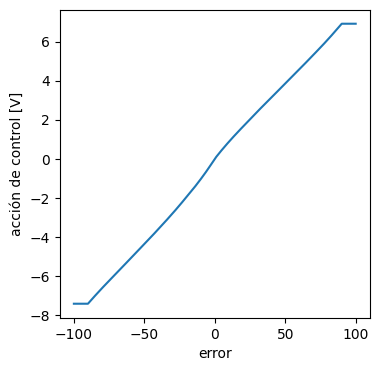

In [304]:
fig = plt.figure(figsize=(4, 4))
plt.plot(error_values,out)
plt.xlabel('error')
plt.ylabel('acción de control [V]')